# Go To Market (G2M) insights to investment in Cab Compnay.


<b>Objective of this project:</b>

Provide actionable insights or recommendations to help a firm in identifying the right Cab company (Yellow or Pink ) for investing.
 

## Data Exploration

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cab_data = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/Cab_Data.csv")
city = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/city.csv")
Transaction_ID = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/Transaction_ID.csv")
customer_ID = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/Customer_ID.csv")
usholidays = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/USHolidays.csv")

In [3]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


"Date of Travel" needs to be changed to date format.

In [4]:
cabdate = cab_data['Date of Travel'].to_list()
startdate = pd.Timestamp('1899-12-29')
cabdates = [startdate + pd.DateOffset(x) for x in cabdate]
cab_data['Date of Travel'] = pd.to_datetime(cabdates,
                                            format='%y-%m-%d')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [5]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
city['Population']=[x.replace(',','') for x in city['Population']]
city['Population']=city['Population'].astype(int)
city['Users']=[x.replace(',','') for x in city['Users']]
city['Users']=city['Users'].astype(int)
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [7]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [8]:
Transaction_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [9]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [10]:
customer_ID


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [11]:
customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
usholidays

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


In [13]:
usholidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


<div class="alert alert-block alert-info">
<b>Missing Value</b> There is no missing value in our entire dataset.
</div>


<b>Merging dataset in one data frame!</b>

In [14]:
cab_data=cab_data.merge(city, how="left", on="City")

In [15]:
cab_data=cab_data.merge(Transaction_ID, how="left", on="Transaction ID")

In [16]:
cab_data=cab_data.merge(customer_ID, how="left", on="Customer ID")

In [17]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [18]:
usholidays['Date']=pd.to_datetime(usholidays['Date'])
cab_data=cab_data.merge(usholidays[['Date',"Holiday"]], how="left", left_on="Date of Travel",right_on ="Date").drop(columns = ['Date'])
cab_data.Holiday=[1 if x is not np.nan else 0 for x in cab_data.Holiday] 
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,0
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,0
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,28712,Cash,Male,53,11242,1
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,28020,Cash,Male,23,23327,0
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,27182,Card,Male,33,8536,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359560,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,52392,Cash,Male,24,15651,0
359561,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,53286,Cash,Male,32,6528,0
359562,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,52265,Cash,Male,56,7966,0
359563,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,52175,Card,Male,32,6423,0


<div class="alert alert-block alert-info">
<b>New Feature</b> Profit is to calculate via:cab_data['profit'] = cab_data['Price Charged'] - 	cab_data['Cost of Trip']
</div>

In [19]:
cab_data['profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

### Descriptive analysis

#### Numerical attributes

In [20]:
cab_data=cab_data.sort_values("Date of Travel").reset_index().drop("index", axis=1)

In [21]:
cab_data[['KM Travelled','Price Charged', 'Cost of Trip']].describe( )

,KM Travelled,Price Charged,Cost of Trip
count,359565.000000,359565.000000,359565.000000
mean,22.566321,423.432973,286.181027
std,12.233477,274.381119,157.994355
min,1.900000,15.600000,19.000000
25%,12.000000,206.430000,151.200000
50%,22.440000,386.350000,282.480000
75%,32.960000,583.650000,413.683200
max,48.000000,2048.030000,691.200000


In [22]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [23]:
Transaction_ID.describe(include ='all')

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


In [24]:
customer_ID.describe(include ='all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


<Figure size 576x576 with 0 Axes>

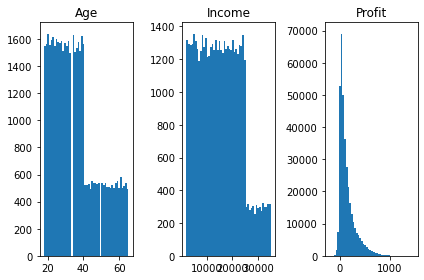

In [25]:

plt.figure(figsize=(8,8)) 
n_bins = 50
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True)
axs[0].hist(customer_ID["Age"], bins=n_bins)
axs[0].set_title("Age")
axs[1].hist(customer_ID["Income (USD/Month)"], bins=n_bins)
axs[1].set_title("Income")
axs[2].hist(cab_data['profit'], bins=n_bins)
axs[2].set_title("Profit");


#### Categorical Attributes

In [26]:
cat_var=["Company","City","Payment_Mode","Gender"]
for i in cat_var:
    print(' The Unique Value of \'{0}\' is:   {1}\n'.format(i,cab_data[i].unique()))
    

 The Unique Value of 'Company' is:   ['Yellow Cab' 'Pink Cab']

 The Unique Value of 'City' is:   ['CHICAGO IL' 'NEW YORK NY' 'SEATTLE WA' 'SACRAMENTO CA' 'PHOENIX AZ'
 'WASHINGTON DC' 'LOS ANGELES CA' 'DALLAS TX' 'SAN DIEGO CA' 'BOSTON MA'
 'SILICON VALLEY' 'MIAMI FL' 'ATLANTA GA' 'DENVER CO' 'TUCSON AZ'
 'NASHVILLE TN' 'AUSTIN TX' 'ORANGE COUNTY' 'PITTSBURGH PA']

 The Unique Value of 'Payment_Mode' is:   ['Card' 'Cash']

 The Unique Value of 'Gender' is:   ['Male' 'Female']



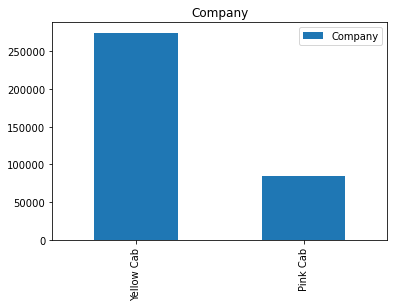

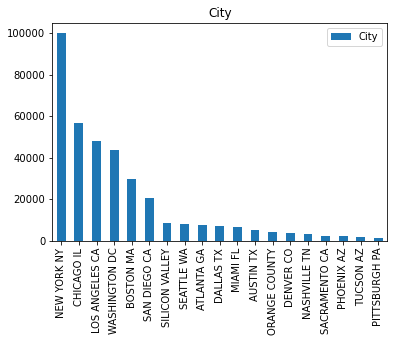

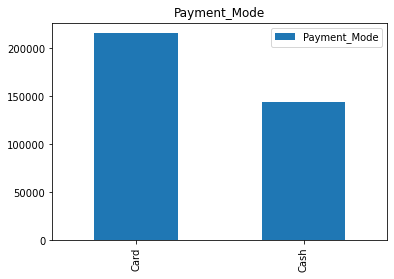

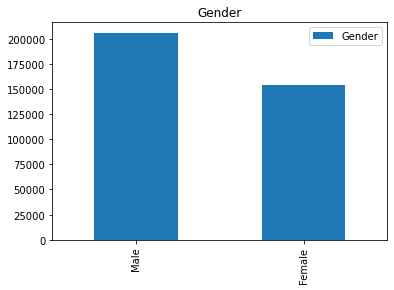

In [27]:
for i in  cat_var:
    pd.DataFrame(cab_data[i].value_counts()).plot(kind='bar', title=i)

The yellow Company has a great number of transaction compared to the pink company.

New York's citizen uses cab systems more than other cities.

Passengers normally pay by card.

Men is the majority group in using cab software.

<b>In this section, the relationship between company and covered users, rides, number of customers, and customers' income as well as age will be discussed.</b>



In [28]:
df1 = cab_data.groupby(by=['City', "Company"]).agg(no_rides=('Customer ID',
                                                             'count'))

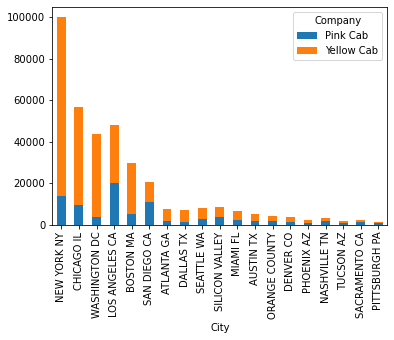

In [29]:
df1.unstack()["no_rides"].sort_values(
    'Yellow Cab', ascending=False).plot.bar(stacked=True);

It is obvious that the number of Yellow company's rides exceeds that of Pick compnay, except for 4 following cities: 

In [30]:
df1.unstack()[df1.unstack()['no_rides']["Pink Cab"]-df1.unstack()['no_rides']["Yellow Cab"]>0]

no_rides           
Company       Pink Cab Yellow Cab
City                             
NASHVILLE TN      1841       1170
PITTSBURGH PA      682        632
SACRAMENTO CA     1336       1033
SAN DIEGO CA     10675       9819

In [31]:
df2 = cab_data.groupby(by=[ "Company"]).agg(no_customer=('Customer ID',
                                                             'nunique'),no_rides=('Customer ID',
                                                             'count'))
df2

,no_customer,no_rides
Company,,
Pink Cab,32330,84739
Yellow Cab,39896,274826


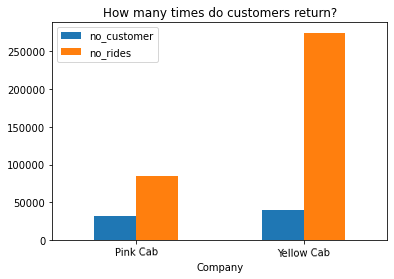

In [32]:
df2.plot.bar(rot=True, title='How many times do customers return?');

Yellow company was able to attract customers' eyes and encourage them to use its application again and again.

Yellow company ride per customer = 6.9

Pink company ride per customer = 2.6

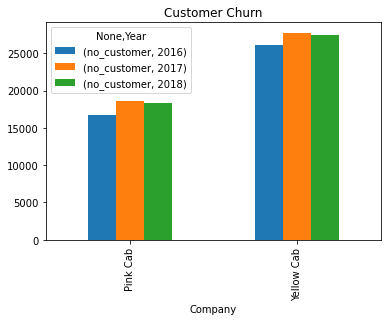

In [33]:
cab_data["Year"]=cab_data['Date of Travel'].dt.year
df_churn= cab_data.groupby(by=["Company", "Year"]).agg(no_customer=('Customer ID',
                                                                'nunique'))
df_churn.unstack().plot.bar(title="Customer Churn");

<b>Both companies ,in a same way, increased customers in 2017, but could not retain some of them in 2018. </b>

<div class="alert alert-block alert-info">
<b>Loyal Customer Rate</b>  = Number of Repeat Customers / Total Customers

</div>


In [34]:
df_repeat= cab_data.groupby(by=["Company", "Year", 'Customer ID']).size().reset_index()
df_R_10=df_repeat[df_repeat.loc[:,0]>10].set_axis(["Company", "Year", 'Customer ID', 'total_10'], axis=1)
df_R_3=df_repeat[df_repeat.loc[:,0]>3].set_axis(["Company", "Year", 'Customer ID', 'total_3'], axis=1)
df_Re_3=df_R_3.groupby(by=["Company", "Year"])['total_3'].sum().unstack()
df_Re_10=df_R_10.groupby(by=["Company", "Year"])['total_10'].sum().unstack()
df_Re_10

Year,2016,2017,2018
Company,,,
Pink Cab,NaN,25.0,NaN
Yellow Cab,9649.0,19481.0,16319.0


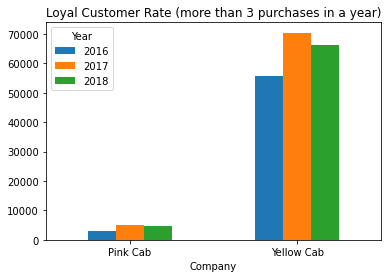

In [35]:
df_Re_3.plot.bar(title = "Loyal Customer Rate (more than 3 purchases in a year)", rot=False);

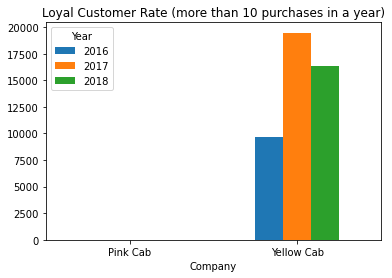

In [36]:
df_Re_10.plot.bar(title = "Loyal Customer Rate (more than 10 purchases in a year)", rot=False);

<b> Customers of Pick cab company are not as loyal as that of Yellow cab </b>

<AxesSubplot:title={'center':'Percentage of Covered Users by Company, city_wise'}, xlabel='City'>

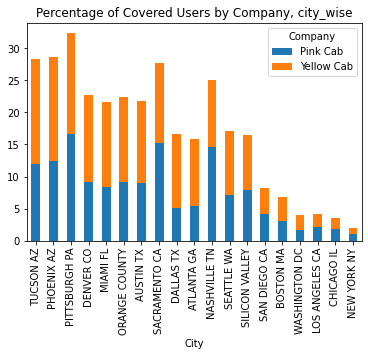

In [37]:
df3 = cab_data.groupby(by=["City", "Company"]).agg(no_customer=('Customer ID',
                                                                'nunique'),
                                                   no_users=('Users', 'max'))
df3["user_covered"] = round(100 * df3["no_customer"] / df3["no_users"], 2)
df3.drop(columns=["no_customer", "no_users"], inplace=True)
df3.unstack()["user_covered"].sort_values(
    'Yellow Cab', ascending=False).plot.bar(
        stacked=True,
        title='Percentage of Covered Users by Company, city_wise')

In [38]:
df3.unstack()[df3.unstack()['user_covered']["Pink Cab"]-df3.unstack()['user_covered']["Yellow Cab"]>0]

user_covered           
Company           Pink Cab Yellow Cab
City                                 
NASHVILLE TN         14.63      10.41
PITTSBURGH PA        16.58      15.76
SACRAMENTO CA        15.30      12.49
SAN DIEGO CA          4.16       4.12

Previously, it has been revealed that Pink company in above mentioned cities has high numbers of rides. Also, in these city, Pink company was able to covered more users that Yellow company.

<b> Trips at Holidays</b>

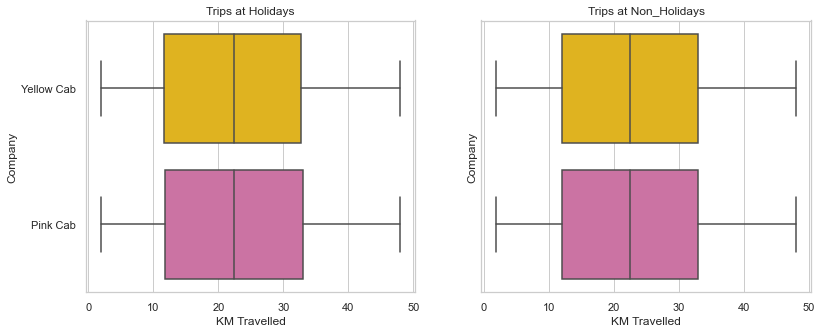

In [101]:
palette = [ '#ffc400', '#d965a4']
Holiday = cab_data[cab_data.Holiday == 1]
Non_Holiday = cab_data[cab_data.Holiday == 0]

fig, ax = plt.subplots(1,2, figsize = (13,5), sharey = True)

sns.boxplot(x = 'KM Travelled', y = 'Company', data = Holiday, palette = palette, 
        order = ['Pink Cab', 'Yellow Cab'], ax = ax[0]).\
set_title('Trips at Holidays');


sns.boxplot(x = 'KM Travelled', y = 'Company', data = Non_Holiday, palette = palette, ax = ax[1]).\
set_title('Trips at Non_Holidays');

plt.show()

When it comes to boxplot, there is no difference between Yellow and Pink Company in distance of travel at Holidays and Non_Holidays.

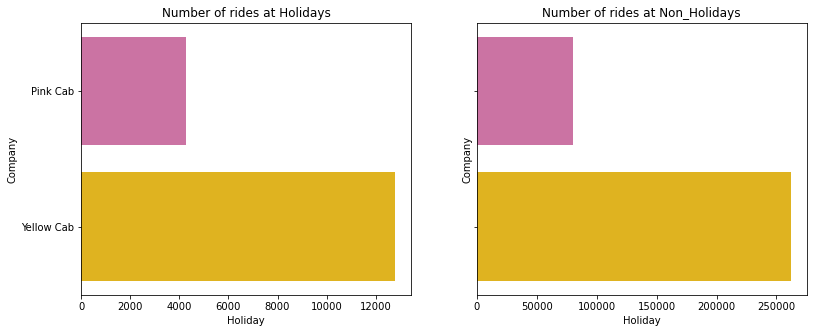

In [60]:
nonHo_rides=Non_Holiday.groupby(by=["Company"])["Holiday"].count().reset_index()
Ho_rides=Holiday.groupby(by=["Company"])["Holiday"].count().reset_index()

fig, ax = plt.subplots(1,2, figsize = (13,5), sharey = True)

sns.barplot(x = 'Holiday', y = 'Company', data = Ho_rides, palette = palette, 
            order = ['Pink Cab', 'Yellow Cab'], ax = ax[0]).\
set_title('Number of rides at Holidays');


sns.barplot(x = 'Holiday', y = 'Company', data = nonHo_rides, palette = palette, ax = ax[1]).\
set_title('Number of rides at Non_Holidays');


However, Yellow cab Co. has more rides at at both holidays and non_holidays than those of Pink Cab Co.

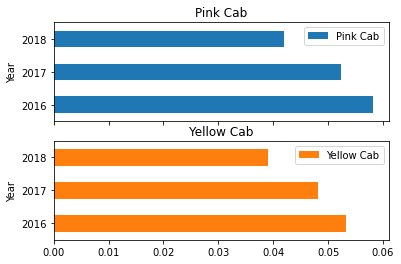

In [39]:
cab_data.groupby(by=["Company",'Year'])["Holiday"].mean().unstack("Company").plot.barh(subplots=True,stacked=True, rot=False);

It is interesting that the proportion of holiday's rides of Pink cab Company to non-holiday's ride is higher that that of Yellow cab Company. It can be concluded if Yellow Co. stops its services Pink Co. can be a good replacement for customers. 

### Correlation analysis (Hypothetical testing)

In [118]:
cab_data[[
    "KM Travelled", "Price Charged", "Cost of Trip", "Population", "Users",
    "Age", "Income (USD/Month)", "profit"
]].corr()

,KM Travelled,Price Charged,Cost of Trip,Population,Users,Age,Income (USD/Month),profit
KM Travelled,1.000000,0.835753,0.981851,-0.002311,-0.000432,-0.000405,-0.000554,0.462767
Price Charged,0.835753,1.000000,0.859811,0.326594,0.281056,-0.003135,0.003207,0.864155
Cost of Trip,0.981851,0.859811,1.000000,0.015115,0.023629,-0.000241,-0.000646,0.486058
Population,-0.002311,0.326594,0.015115,1.000000,0.915494,-0.009034,0.011886,0.544079
Users,-0.000432,0.281056,0.023629,0.915494,1.000000,-0.005941,0.010496,0.457748
Age,-0.000405,-0.003135,-0.000241,-0.009034,-0.005941,1.000000,0.003957,-0.005128
Income (USD/Month),-0.000554,0.003207,-0.000646,0.011886,0.010496,0.003957,1.000000,0.006126
profit,0.462767,0.864155,0.486058,0.544079,0.457748,-0.005128,0.006126,1.000000


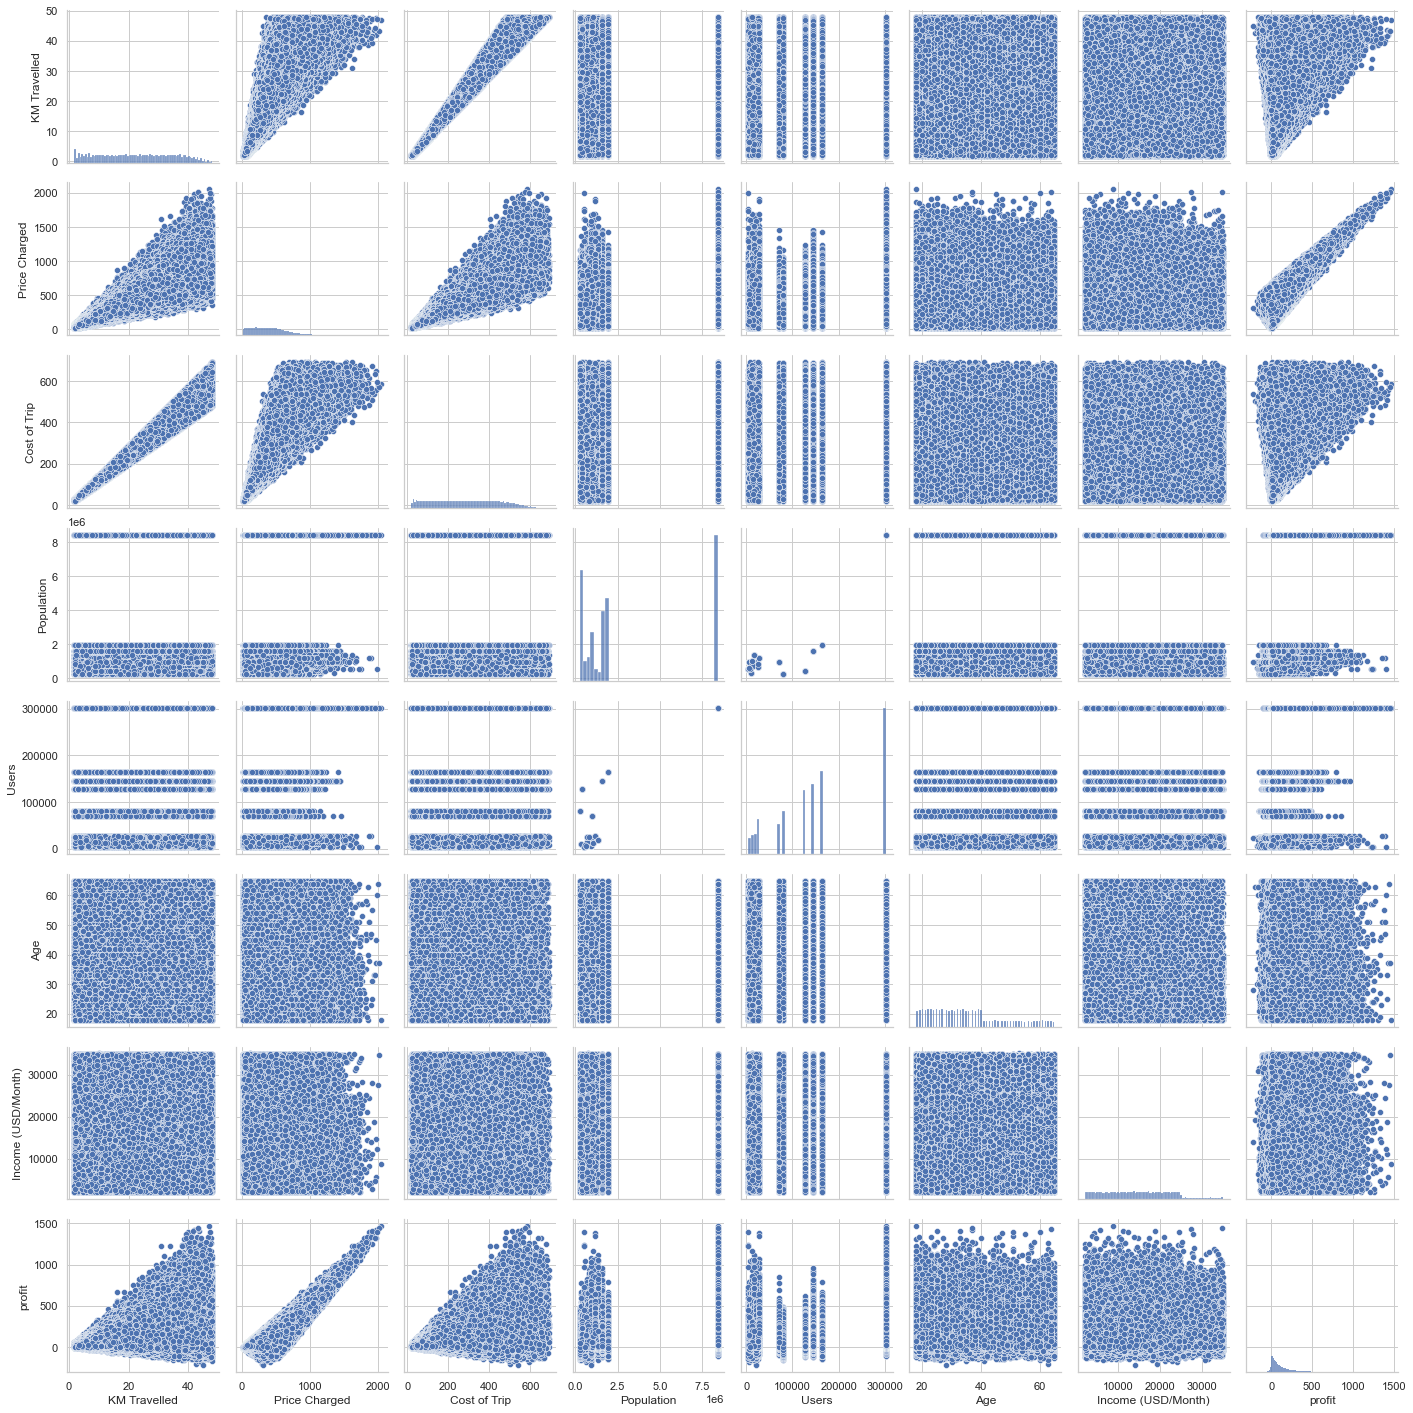

In [119]:
sns.pairplot(cab_data[[
    "KM Travelled", "Price Charged", "Cost of Trip", "Population", "Users",
    "Age", "Income (USD/Month)", "profit"
]])
plt.show()

The correlation depicts that KM Travelled,	Price Charged , Cost of Trip are correlated with each other. As it is clear, profit is supposed to be correlated with all previous features. 

The important conclusion is no correlation among population, users, income, and age.

<big><b>Let's test some above hypotheses.</b></big>  

Hypothesis 1:


$H_0$  : There is no difference in Age of customers.

$H_1$  : There is difference in Age of customers.



According to the descriptive analysis, the mean of data is the 35 year old, so I select 35 for this test.

In [146]:
#Pink cab Co.
a = cab_data[(cab_data.Age <= 35)&(cab_data.Company=='Pink Cab')]["profit"]

b = cab_data[(cab_data.Age > 35)&(cab_data.Company=='Pink Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in age for Pink cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in age for Pink cabs.')

P value is  0.07624296147771467
H0 cannot be rejected, so there is no difference in age.


In [147]:
#Yellow cab Co.
a = cab_data[(cab_data.Age <= 35)&(cab_data.Company=='Yellow Cab')]["profit"]

b = cab_data[(cab_data.Age > 35)&(cab_data.Company=='Yellow Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in age for Yellow cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in age for Yellow cabs.')

P value is  0.8131224357107243
H0 cannot be rejected, so there is no difference in age for Yellow cabs.


Hypothesis 2:

$H_0$: There is no difference in Income of customers.

$H_1$: There is difference in Income of customers.

According to the descriptive analysis, the mean of Income is 15015.

In [151]:
#Pink cab Co.
a = cab_data[(cab_data["Income (USD/Month)"] <= 15015)&(cab_data.Company=='Pink Cab')]["profit"]

b = cab_data[(cab_data["Income (USD/Month)"] > 15015)&(cab_data.Company=='Pink Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in income for Pink cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in income for Pink cabs.')

P value is  0.03818361802319076
H1 can be accepted, so there is difference in income for Pink cabs.


In [152]:
#Yellow cab Co.
a = cab_data[(cab_data["Income (USD/Month)"]<= 15015)&(cab_data.Company=='Yellow Cab')]["profit"]

b = cab_data[(cab_data["Income (USD/Month)"] > 15015)&(cab_data.Company=='Yellow Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in income for Yellow cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in income for Yellow cabs.')

P value is  3.983387219671155e-10
H1 can be accepted, so there is difference in income for Yellow cabs.



Hypothesis 3:

$H_0$  : There is no difference in Gender.

$H_1$ : There is difference in Gender.


In [155]:
#Pink cab Co.
a = cab_data[(cab_data.Gender == "Male")&(cab_data.Company=='Pink Cab')]["profit"]

b = cab_data[(cab_data.Gender == "Female")&(cab_data.Company=='Pink Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in gender for Pink cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in gender for Pink cabs.')

P value is  0.117985940330773
H0 cannot be rejected, so there is no difference in gender for Pink cabs.


In [154]:
#Yellow cab Co.
a = cab_data[(cab_data.Gender == "Male")&(cab_data.Company=='Yellow Cab')]["profit"]

b = cab_data[(cab_data.Gender == "Female")&(cab_data.Company=='Yellow Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in gender for Yellow cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in gender for Yellow cabs.')

P value is  8.72127175426404e-25
H1 can be accepted, so there is difference in gender for Yellow cabs.


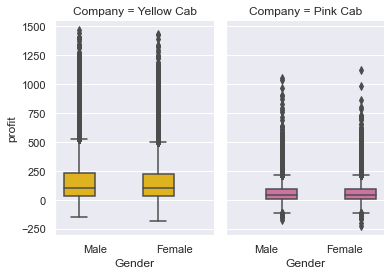

In [158]:
ax = sns.catplot(x="Gender",
                 y="profit",
                 hue="Company",
                 col="Company",
                 data=cab_data,
                 kind="box",
                 height=4,
                 aspect=.7,
                 palette=palette)

Hypothesis 4:

$H_0$ : There is no difference in Payment_Mode.

$H_1$ : There is difference in Payment_Mode.


In [160]:
#Pink cab Co.
a = cab_data[(cab_data.payment == "Cash")&(cab_data.Company=='Pink Cab')]["profit"]

b = cab_data[(cab_data.payment == "Card")&(cab_data.Company=='Pink Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in gender for Pink cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in gender for Pink cabs.')

AttributeError: 'DataFrame' object has no attribute 'payment'

In [ ]:
#Yellow cab Co.
a = cab_data[(cab_data.Gender == "Male")&(cab_data.Company=='Yellow Cab')]["profit"]

b = cab_data[(cab_data.Gender == "Female")&(cab_data.Company=='Yellow Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in gender for Yellow cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in gender for Yellow cabs.')

## Profit

In this section, I am looking for the relationship between Profit and other features.